In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [80]:
# load dataset into Pandas DataFrame
iris = pd.read_csv("iris.data", names=['sepal length','sepal width','petal length','petal width','target'])
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
iris.tail()

,sepal length,sepal width,petal length,petal width,target
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [57]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [58]:
iris.shape

(150, 5)

In [59]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [60]:
iris.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'target'], dtype='object')

In [61]:
iris.keys()

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'target'], dtype='object')

In [62]:
iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64

In [63]:
iris_s= iris[iris['target']=='Iris-setosa']
iris_vc= iris[iris['target']=='Iris-versicolor']
iris_v = iris[iris['target']=='Iris-virginica']

In [64]:
s_len = iris['sepal length'].values * 10

(array([[ 9., 19., 12.,  9.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  3.,  2., 16.,  9., 11.,  7.,  2.,  0.,  0.],
        [ 0.,  1.,  0.,  2.,  6., 15., 11.,  4.,  5.,  6.]]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 3 BarContainer objects>)

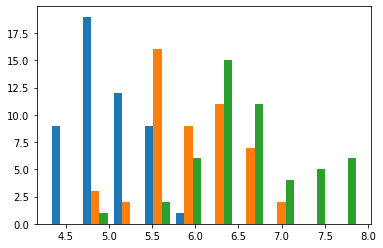

In [65]:
plt.hist([iris_s['sepal length'],iris_vc['sepal length'],iris_v['sepal length']])

(array([[ 0.,  1.,  0.,  1., 11., 16.,  8.,  9.,  2.,  2.],
        [ 3.,  6., 12., 13., 11.,  5.,  0.,  0.,  0.,  0.],
        [ 1.,  0., 10., 10., 16., 10.,  1.,  2.,  0.,  0.]]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 3 BarContainer objects>)

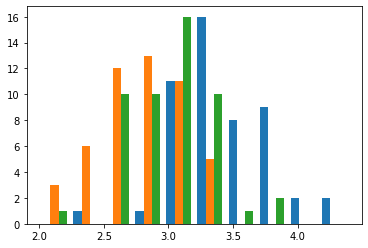

In [66]:
plt.hist([iris_s['sepal width'],iris_vc['sepal width'],iris_v['sepal width']])

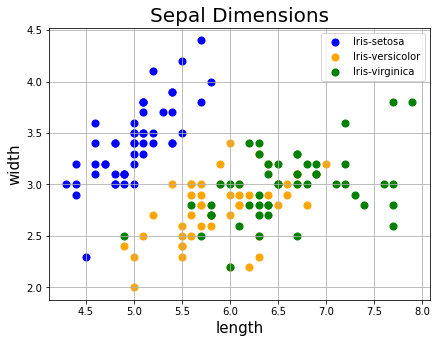

In [67]:
fig = plt.figure(figsize = (15,5))
#1st - nrows
#2nd - ncols
#3rd - index number or chart number
ax = fig.add_subplot(1,2,1) 
ax.set_xlabel('length', fontsize = 15)
ax.set_ylabel('width', fontsize = 15)
ax.set_title('Sepal Dimensions', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['blue', 'orange', 'green']
for target, color in zip(targets,colors):
    indicesToKeep = iris['target'] == target
    ax.scatter(iris.loc[indicesToKeep, 'sepal length']
               ,iris.loc[indicesToKeep, 'sepal width']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

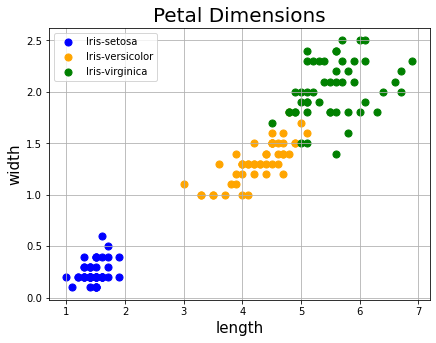

In [68]:
fig = plt.figure(figsize = (15,5))
#1st - nrows
#2nd - ncols
#3rd - index number or chart number
ax = fig.add_subplot(1,2,2) 
ax.set_xlabel('length', fontsize = 15)
ax.set_ylabel('width', fontsize = 15)
ax.set_title('Petal Dimensions', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['blue', 'orange', 'green']
for target, color in zip(targets,colors):
    indicesToKeep = iris['target'] == target
    ax.scatter(iris.loc[indicesToKeep, 'petal length']
               ,iris.loc[indicesToKeep, 'petal width']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [69]:
from sklearn.preprocessing import StandardScaler
columns = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = iris.loc[:, columns].values

# Separating out the target
y = iris.loc[:,['target']].values

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [71]:
target = pd.get_dummies(iris['target'])
target

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [72]:
attr = iris.drop('target',axis=1).values
attr

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [73]:
type = iris['target'].values
type

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [79]:
iris.drop(['target'],axis=1,inplace=True)
iris

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [75]:
iris = pd.concat([iris,target],axis=1)
iris

,sepal length,sepal width,petal length,petal width,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [76]:
scaler=StandardScaler()
scaler.fit(iris)

StandardScaler()

In [81]:
X = iris.drop('target',axis=1).values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [82]:
Y = iris['target'].values
Y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

### Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
y_pred=reg.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

In [88]:
model=LogisticRegression(solver='liblinear',random_state=0).fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [89]:
model.predict(x)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [90]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm=confusion_matrix(y_test,y_pred)
cm

array([[12,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  6]], dtype=int64)

In [91]:
accuracy_score(y_test,y_pred)

0.9666666666666667

### Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

dc=DecisionTreeClassifier(random_state=0)
dc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [93]:
y_pred2=dc.predict(x_test)
y_pred2

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

In [94]:
cm_dt = confusion_matrix(y_test,y_pred2)
cm_dt

array([[12,  0,  0],
       [ 0, 10,  2],
       [ 0,  0,  6]], dtype=int64)

In [95]:
accuracy_score(y_test,y_pred2)

0.9333333333333333

In [96]:
df=dc.fit(x_test,y_pred2)
plt.figure(figsize=(15,7))

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

[Text(133.92000000000002, 190.26, 'X[3] <= 0.7\ngini = 0.658\nsamples = 30\nvalue = [12, 10, 8]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0]'),
 Text(200.88000000000002, 135.9, 'X[3] <= 1.7\ngini = 0.494\nsamples = 18\nvalue = [0, 10, 8]'),
 Text(133.92000000000002, 81.53999999999999, 'X[0] <= 5.2\ngini = 0.165\nsamples = 11\nvalue = [0, 10, 1]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7]')]

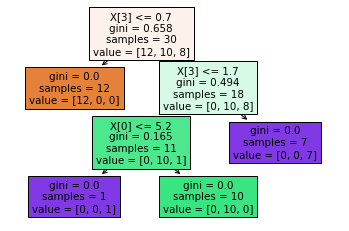

In [97]:
plot_tree(df,filled=True)

### Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [99]:
y_pred3=classifier.predict(x_test)
y_pred3

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

In [100]:
cm_rf = confusion_matrix(y_test,y_pred3)
cm_rf

array([[12,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  6]], dtype=int64)

In [101]:
accuracy_score(y_test,y_pred3)

0.9666666666666667

### K Nearest Neighbour

In [102]:
from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [103]:
y_pred4=classifier.predict(x_test)
y_pred4

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

In [104]:
cm_k=confusion_matrix(y_test,y_pred4)
cm_k

array([[12,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  6]], dtype=int64)

In [105]:
accuracy_score(y_test,y_pred4)

0.9666666666666667

In [106]:
error=[]
for i in range(1,60):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    Ypred_i=knn.predict(x_test)
    error.append(np.mean(Ypred_i !=y_test))

Text(0, 0.5, 'Mean Error')

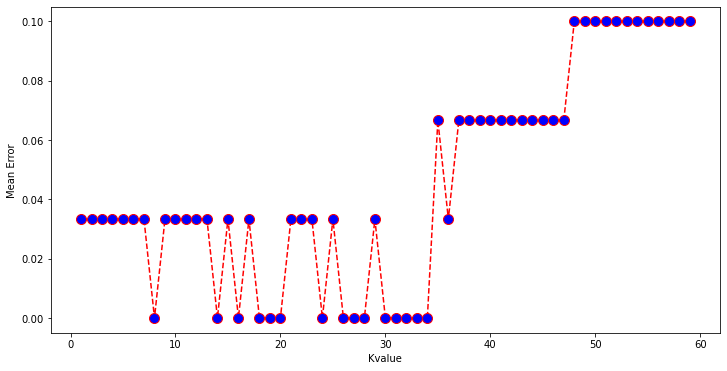

In [107]:
plt.figure(figsize=(12,6))
plt.plot(range(1,60),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel('Kvalue')
plt.ylabel('Mean Error')